# Introduction

This jupyter notebook reproduces the main figures (the three figures with the rates) from the review by Mandel & Broekgaarden (2021) on "Rates of Compact Object Coalescence". In order to reproduce the figures one needs to download the data that is available on https://zenodo.org/record/5072401  !Make sure to use the latest version of the dataset!

To make the figures from the paper, put all the data (at least 26 files, unless you are only interested in reproducing one of the Compact Object flavors) in one directory that we will refer to in the remaining jupyter notebook as the *path_to_data_directory*. Enter the path to the directory below, and run the jupyter notebook cells. 




### Reference
If you use this data/code for publication, please cite both the paper: Mandel & Broekgaarden (2021) https://arxiv.org/abs/2107.14239 and the dataset on Zenodo through it's doi https://zenodo.org/record/5232245 doi: [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.5232245.svg)](https://doi.org/10.5281/zenodo.5232245)



For any questions or inquiry, please email one of or both the authors: 
Ilya Mandel: ilya.mandel@monash.edu 
Floor Broekgaarden: floor.broekgaarden@cfa.harvard.edu

In [1]:
# full path to the directory with all data files   
# change this to your path with the data directory
path_to_data_directory = '/Users/floorbroekgaarden/Projects/GitHub/Rates_of_Compact_Object_Coalescence/Data_Mandel_and_Broekgaarden_2021/'



In [2]:
# the following lines import the `default_scripts` files that contains some global code / settings that are used throughout this jupyter notebook
# if for some reason the python script is not working, or not importing, one can copy paste the code in the script and run it in a cell above/below this block 
# Not all codes / libraries loaded are strictly needed. 

import sys
sys.path.append('.') 
from default_scripts import * 

# just to make the cells appear wider: comment these lines if needed. 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



/Users/floorbroekgaarden/Projects/GitHub/Rates_of_Compact_Object_Coalescence/plottingCode/default_scripts.py:23: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
/Users/floorbroekgaarden/Projects/GitHub/Rates_of_Compact_Object_Coalescence/plottingCode/default_scripts.py:24: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']


In [32]:
xf = 195/29

print(xf)
print(119/xf)

6.724137931034483
17.697435897435895


In [39]:
# Basic scripts / code for plotting compact coalescence rates 


import numpy as np
import matplotlib.pyplot as plt
# for e.g., minor ticks 
from matplotlib.ticker import (FormatStrFormatter,
                               AutoMinorLocator)

import matplotlib
import seaborn as sns # only used for sns colors 
import pandas as pd # to read in the csv files 


from astropy import units as u
from astropy import constants as const

from matplotlib import rc                                                                                                                                                                                                                    
from matplotlib import rcParams
#Set latex environment for plots/labels
rc('font', family='serif', weight = 'bold')
rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
rc('axes', linewidth=2)

matplotlib.rcParams['xtick.major.size'] = 12
matplotlib.rcParams['ytick.major.size'] = 12
matplotlib.rcParams['xtick.minor.size'] = 8
matplotlib.rcParams['ytick.minor.size'] = 8
matplotlib.rcParams['font.weight']= 'bold'
matplotlib.rcParams.update({'font.weight': 'bold'})

fs = 24 # fontsize for plots
rc('axes', linewidth=2)


# Some global dictionaries to take care of labels and coloring:
all_names = [ 'GWs', 'sGRBs', 'kilonovae', 'pulsars',\
                       'isolated binaries',  'CHE','pop-III','triples', 'dynamical: GC', 'dynamical: NC',  'dynamical: YSC',  'primordial']

# colors for each group
c_GW = 'orangered'
c_GRB = sns.color_palette("husl", 12)[0] #  sns.color_palette("husl", 20)[1] 
c_kn = sns.color_palette("husl", 12)[1] #'darkgoldenrod' #sns.color_palette("husl", 20)[3]
c_psr =  sns.color_palette("husl", 12)[2]# "orange"

c_iso = sns.color_palette("husl", 12)[4] #  sns.color_palette("husl", 20)[6] #'limegreen'
c_che = sns.color_palette("husl", 12)[5] #"forestgreen" #sns.color_palette("husl", 20)[8]
c_popIII = sns.color_palette("husl", 12)[6] # "c" #"turquoise" # sns.color_palette("husl", 20)[12]
c_trip = sns.color_palette("husl", 12)[7] #"royalblue" #sns.color_palette("husl", 20)[13]

c_GC =  sns.color_palette("husl", 12)[9] #sns.color_palette("husl", 20)[15] 
c_NC = sns.color_palette("husl", 12)[10] # "blueviolet" #
c_YC =  sns.color_palette("husl", 12)[11] # "magenta"

c_prim = "royalblue" #"brown"


colors = [c_GW, c_GRB, c_kn, c_psr, c_iso, c_che, c_popIII, c_trip, c_GC, c_NC, c_YC, c_prim]

# automatic rainbow: 
# colors = sns.color_palette("husl", len(all_names))   

name_colors = dict(zip(all_names, colors))
name_labels = [ r'Gravitational waves', r'Short gamma-ray bursts', r'Kilonovae',  r'Galactic pulsar binaries',\
                       r'Isolated binary evolution',  r'Chemically homogeneous evolution', r'Population III stars', r'Triples/Multiples', r'Globular clusters', r'Nuclear star clusters',  r'Young/Open star clusters', r'Primordial']
names_label_dict = dict(zip(all_names, name_labels))
dictDCOdirectory = {'BHBH':'BH-BH', 'BHNS': 'NS-BH', 'NSNS':'NS-NS'}










def draw_vlines(axe, v_values):
    """ draws vertical grid lines at values in the v_values list """
    
    for v_ in v_values:
        # draw vertical line that looks similar to grid line 
#         axe.plot([v_, v_], [-1E5, 2], lw=2, c='gray', ls='-', zorder=0)
        axe.plot([v_, v_], [-1E5, 2], lw=1.5, c='gray', ls=':', zorder=0)
        
    return 





def make_up_axes(axe=None, DCOtype='BHNS',  df_names=['a', 'b'], ordered=None, version='ArXiv'):
    """ creates several things that are axes related"""

    xmin,xmax = 1E-3, 1E5
        
    # axes layout and mark up 
    axe.set_xscale('log')
    DCOname_dict = {'BHNS':'NS-BH', 'BHBH':'BH-BH', 'NSNS':'NS-NS'}
    xlabel = r'$\rm{Local } \  \textbf{%s} \ $'%DCOname_dict[DCOtype] + r'$\textbf{merger} \ \textbf{rate} \ \textbf{density} \ \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
    
    
    bps_names = []
    codes_names = []
   

    v_height=0
    yticks=[]   
    for ind_file, csv_filename in enumerate(df_names):
        
        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13])
        df = df.iloc[:,1::2]

        rate_max_list = []
        codes_list = []
        
        df_codes = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,8,9,10,11,12,13])
        df_codes = df_codes.iloc[:,1::2]
        codes = df_codes.columns

        v_height+= -1
        if ordered=='max':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]
                
                rate_max_list.append(np.max(rate))
                
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(rate_max_list))
        
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]
            
        elif ordered=='year':
            colum_list_sorted = df.columns 
            for ind_n, name in enumerate(df.columns):              
                code = df_codes[name][0]
                codes_list.append(code)
            codes_list_sorted = np.asarray(codes_list)
        
        
        elif ordered=='code':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]
                
                rate_max_list.append(np.max(rate))
                
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(codes_list))
        
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]     
        
        else:
            colum_list_sorted = df.columns        
            codes_list_sorted = codes 
            

        
        for ind_m, bps_model in enumerate(colum_list_sorted):
            bps_names.append(r'\textbf{%s}'%(bps_model) )
            codes_names.append(r'\textbf{%s}'%(codes_list_sorted[ind_m]) )
            yticks.append(v_height)
            v_height+=-1
        
        # add blank line after each channel 
        v_height+= -1 

    axe.set_yticks([])

    
    axe.set_xlim(xmin, xmax)
    axe.set_ylim(-len(bps_names) -2*len(df_names)+0.5, 0.5)
    
    if version=='ArXiv':
        # add x labels on top
        ax2x = axe.twiny()
        ax2x.set_xscale('log')   
        ax2x.set_xlim(xmin, xmax)
        ax2x = layoutAxesNoYlabel(ax2x, nameX=xlabel, nameY=r'NA', fontsize=fs+6, setMinor=False, second=True, labelpad=20)
    
    axe = layoutAxesNoYlabel(axe, nameX=xlabel, nameY=r'NA', fontsize=fs+6, setMinor=False, labelpad=4)


    return 
    
     
    




def plot_using_plotting_style(axe, ps, x_, y_, color):
    """ uses the plotting style (integer ps between 0 and 30) 
    to plot the data given the plottingstyle that is given in the csv file 
    the dictionary is: 

    1: only upper limit(s) 
    2: only lower limit(s) 
    3: interval without center value
    4: interval with center value   (90% confidence interval or so) 
    5: interval with range of simulation values 
    6: interval with range of simulation values last point is upper limit 
    7: interval with range of simulation values first point is lower limit 
    8: (two confidence intervals)  range + two center values (weird one) 
    9: interval with range of simulation values , first one is fiducial 
    10; interval with range of simulation values use ylim to add lower limit 
    11; interval with range of simulation values , first two are fiducial 
    12: single estimate without error bars 
    13; interval with range of simulation values , first three are fiducial 
    14; interval with range of simulation values use ylim to add upper limit 
    15: interval, upper 3 are upper limits 
    16: two upper limits 
    17: interval with range of simulation values first point is upper limit 
    18: interval with range of simulation values first point is upper limit  +   2 upper ones are upper limits
    19:
    20: 
    
    """ 
    
    # draw upper/lower limit: 
    if ps in [1,2,6,7, 10, 12, 14, 15 , 16, 17 , 18, 19, 20 ]:
        msize = 400
        if ps in [1,6,14]:
            mstyle = 4 # upper limit 
            axe.scatter(np.max(x_), np.max(y_), s=msize, c='k', zorder=1E6, marker=mstyle)
        if ps in [20]:
            mstyle =  8 # upper limit but triangle more to the left 
            axe.scatter(1.05*np.max(x_), np.max(y_), s=msize, c='k', zorder=1E6, marker=mstyle)
        elif ps in [17, 18]:
            mstyle=4 # upper limit  (lower limit)
        # draw upper or lower limit
            axe.scatter(np.min(x_), np.min(y_), s=msize, c='k', zorder=1E6, marker=mstyle)            
        elif ps in [2,7]:
            mstyle=5 # lower limit 
        # draw upper or lower limit
            axe.scatter(np.min(x_), np.min(y_), s=msize, c='k', zorder=1E6, marker=mstyle)
        elif ps in [14]:
            mstyle=4
            # 1E4 is upper limit 
            axe.scatter(0.99*1E5, np.max(y_), s=msize, c='cyan', zorder=1E6, marker=mstyle)
        elif ps in [15]:
            mstyle=4
            # top 3 are upper limit  
            axe.scatter(x_[-3:], y_[-3:], s=msize, c='k', zorder=1E6, marker=mstyle)
        elif ps in [18]:
            mstyle=4
            # top 2 are upper limit  
            axe.scatter(x_[-2:], y_[-2:], s=msize, c='k', zorder=1E6, marker=mstyle)
        elif ps in [16]:
            mstyle=4
            # top 3 are upper limit  
            axe.scatter(x_[-2:], y_[-2:], s=msize, c='k', zorder=1E6, marker=mstyle)
        elif ps in [10]:
            mstyle=5
            # 1E-3 is lower limit y axis 
            axe.scatter(1E-3, np.max(y_), s=msize, c='cyan', zorder=1E6, marker=mstyle)
        elif ps in [12]:
            msize = 125
            axe.scatter(x_, y_, s=msize, c=np.asarray([color]), zorder=1E2, marker='o') 
        elif ps in [19]:
            mstyle=4
            # 1E-3 is upper lower limit y axis 
            axe.scatter(1E-3, np.max(y_), s=msize, c='cyan', zorder=1E6, marker=mstyle)



    # draw error bar 
    msize = 125
    if ps in [3,4,5,6, 7, 8,9,10,11,13, 14, 15, 17, 18 ]:
        axe.errorbar(x=[np.min(x_),np.max(x_)], y=[y_[0], y_[0]], yerr=2*[0.42], color=color, zorder=5, lw=5.5, ecolor=color)
        axe.errorbar(x=[np.min(x_),np.max(x_)], y=[y_[0], y_[0]], yerr=2*[0.42], fmt='o', zorder=1E5, lw=3.5, ecolor='k', color='k')
        if ps==4:
            # plot center values
            axe.scatter(x_[1], y_[1], s=msize, c='k', zorder=1E2, marker='o')
        elif ps==3:
            # don't plot scatter points
            pass
        elif ps==15:
            axe.scatter(x_[0:3], y_[0:3], s=msize, color=[color], zorder=1E2, marker='o') 
        else:
            axe.scatter(x_, y_, s=msize, color=[color], zorder=1E2, marker='o') 

 
    return 




# some functions to make beautiful axes 

def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


def layoutAxesNoYlabel(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    # ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


def layoutAxesNoXlabel(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    # ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    # ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax









def plotDCOrates(axe, df_names, df_colordict, df_labels, DCOtype='BHNS', ordered=None, plotmedians=False, version='ArXiv'):
    """    
    
    axe: axe to plot the figure on 
    df_names: names of the textfiles with the data  
    df_colordict: color map for the data files 
    df_labels: map to the label names of the data files  
    DCOtype: Double Compact object type, options are 'BHNS', 'BHBH' or 'NSNS'  
    ordered: way to order the different studies within a sub group. 
    Ordered Options are 'year', 'code' (based on code names) and 'max' (based on maximum rates; under construction)
    
    
    """    

    

    

    v_height=0
    for ind_file, csv_filename in enumerate(df_names):
        
        v_height_top = int(v_height) +.5

        
        medians_list = [] # list where we will save the medians of each rate estimate

        
        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
        df = df.iloc[:,1::2]
        
        # plotting style 
        df_ps = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,8])
        df_ps = df_ps.iloc[:,1::2]

        rate_max_list = []
        codes_list = []
        
        df_codes = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,7,8])
        df_codes = df_codes.iloc[:,1::2]
        
        labelname = df_labels[ind_file]
        
        rate_max_list = []
        plot_styles   = []
        
        if ordered=='max':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                rate_max_list.append(np.max(rate))
            
            sorted_ind = np.argsort(np.asarray(rate_max_list))
        
            colum_list = df.columns[sorted_ind]
            colum_list_sorted = df.columns[sorted_ind]
        
        
        elif ordered=='code':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                rate_max_list.append(np.max(rate))
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(codes_list))
            colum_list = df.columns[sorted_ind]
        
            
            ##
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]
            
    
        

        elif ordered=='year':
            colum_list = df.columns
            colum_list_sorted = df.columns
            
        else:
            print('ERROR')
#             colum_list = df.columns
            
            
        # obtain ordered:
        
        
        v_height+= -1
        for ind_n, name in enumerate(colum_list):
            
            
            
            rate = df[name]

            mask_notna = (df[name].notna())
            rate = rate[mask_notna]
            

            # read in plotting style 
            ps = df_ps[name][0]
            if ps in range(100):
                plot_using_plotting_style(axe, ps, x_=np.asarray(rate), y_=v_height*np.ones_like(rate), color=df_colordict[labelname])
            else: # if undefined 
                plot_using_plotting_style(axe, ps=3, x_=np.asarray(rate), y_=v_height*np.ones_like(rate), color=df_colordict[labelname])

            medians_list.append(np.median(rate))


            ## ADD LABELS to the left of the measurements 
#             if version=='ArXiv':
            if (min(rate)>2*1E-2) & (min(rate)<=1E5):
                axe.text(min(rate)/1.25, v_height, s=colum_list[ind_n], ha='right', va='center', fontsize=fs-5)
            elif (min(rate)>1E5):
                axe.text(1E5/1.5, v_height, s=colum_list[ind_n], ha='right', va='center', fontsize=fs-5)   
            # plot on the right side 
            elif ((min(rate)<=2*1E-2) & (max(rate)>1E-3)):
                axe.text(max(rate)*1.25, v_height, s=colum_list[ind_n], ha='left', va='center', fontsize=fs-5)
            elif ((min(rate)<=2*1E-2) & (max(rate)<=1E-3)):
                axe.text(1E-3*1.35, v_height, s=colum_list[ind_n], ha='left', va='center', fontsize=fs-5)

            switchLabelLeft=False
            # if plotting the first rate, add in text which type of formation channel we are plotting 
            if ind_n==(0): #len(df.columns)-1
                dict_name = df_labels[ind_file]
                # plot the following ones as exception somewhere else:
                if ((DCOtype=='BHNS') & (dict_name=='isolated binaries')) | ((DCOtype=='NSNS') & (dict_name=='isolated binaries')):
                    switchLabelLeft = True
                elif (DCOtype=='NSNS') & (dict_name=='GWs') | (DCOtype=='NSNS') & (dict_name=='sGRBs') | (DCOtype=='NSNS') & (dict_name=='kilonovae') | (DCOtype=='NSNS') & (dict_name=='pulsars') | (DCOtype=='BHNS') & (dict_name=='pulsars'):
                    switchLabelLeft = True 
                elif ((DCOtype=='NSNS') & (dict_name=='triples')) :
                    switchLabelLeft = True                    
                if switchLabelLeft==True:
                    axe.text(1.15*1E-3, v_height+0.3, s=r'\textbf{%s}'%names_label_dict[dict_name] , rotation = 0, fontsize = fs+8, color=df_colordict[labelname], ha = 'left', va='center', weight = 'bold')
                elif (DCOtype=='BHBH') & (dict_name == 'CHE'):
                    axe.text(9*1E4,  v_height+0.3-1.5, s=r'\textbf{%s}'%names_label_dict[dict_name] , rotation = 0, fontsize = fs+8, color=df_colordict[labelname], ha = 'right', va='center', weight = 'bold')
                else:
                    axe.text(9*1E4,  v_height+0.3, s=r'\textbf{%s}'%names_label_dict[dict_name] , rotation = 0, fontsize = fs+8, color=df_colordict[labelname], ha = 'right', va='center', weight = 'bold')

            v_height+= -1  # height of rate to plot on vertical axes  


            
        v_height+= -1

        v_height_bottom = int(v_height)+0.5

        
        if ind_file!=(len(df_names)-1):   
            axe.plot([1E-3, 1E5],  [v_height+0.5]*2, lw=1.5, c='gray', ls=':', zorder=0)
    
        if plotmedians==True:
        # add bar with median values of the medians from this channel/list 
            super_median = np.median(medians_list)
            axe.fill_between(x=[super_median/1.5, super_median*1.5], y1=[v_height_bottom]*2, y2=[v_height_top]*2, color=df_colordict[labelname], alpha=0.2, zorder=1)

    print('the total vertical length of the %s plot reaches: %s'%(DCOtype, v_height), 'this is information floor uses for deciding the length of the figure - ignore this')

    return 



def make_figure(DCOtype='BHNS', ordered='max', plotmedians=False, path_to_data_directory='path/', version='ArXiv'):
    
    cm = 1/2.54
    ncols, nrows=1,1
    
    # all data files are structured (in path / file name ) to start with the following
    DCOdirectoryPath = path_to_data_directory + dictDCOdirectory[DCOtype]+'_rates_'
    
    v_height_BBH = 114  # obtained from the printed information, used to scale the length of the figures 

    if DCOtype in ['BHBH']:
        s_text = r'Local merging BH-BH rate' 
        
        names =   [DCOdirectoryPath+'observations-GWs.csv',\
                   DCOdirectoryPath+'isolated-binary-evolution.csv', DCOdirectoryPath+'CHE.csv',
                   DCOdirectoryPath+'population-III.csv',DCOdirectoryPath+'triples.csv',\
                   DCOdirectoryPath+'globular-clusters.csv',\
                  DCOdirectoryPath+'nuclear-clusters.csv', DCOdirectoryPath+'young-stellar-clusters.csv', 
                    DCOdirectoryPath+'primordial.csv']
        rate_labels = ['GWs','isolated binaries', 'CHE', 'pop-III', 'triples','dynamical: GC', 'dynamical: NC',  'dynamical: YSC',    'primordial']
        d1_, d2_ = 20,29
        if version=='LRR':
            d1_, d2_ =  17.7, 29  #  11.9*cm, 19.5*cm
       

        
    elif DCOtype=='BHNS': 
        s_text = r'Local merging NS-BH rate' 
        
        names =   [DCOdirectoryPath+'observations-GWs.csv',\
                    DCOdirectoryPath+'observations-pulsars.csv',\
                   DCOdirectoryPath+'isolated-binary-evolution.csv', DCOdirectoryPath+'CHE.csv',
                   DCOdirectoryPath+'population-III.csv', DCOdirectoryPath+'triples.csv',\
                   DCOdirectoryPath+'globular-clusters.csv',\
                  DCOdirectoryPath+'nuclear-clusters.csv', DCOdirectoryPath+'young-stellar-clusters.csv'\
                   ]
        rate_labels = ['GWs','pulsars','isolated binaries', 'CHE', 'pop-III',  'triples' , 'dynamical: GC', 'dynamical: NC',  'dynamical: YSC']
        d1_ = 20 
        d2_ = 22*(67/v_height_BBH )+6
        if version=='LRR':
            d1_, d2_ =  17.7, 29* (67/v_height_BBH )  #  11.9*cm, 19.5*cm
#         if version=='LRR':
#             d1_, d2_ = 11.9*cm, 19.5*cm * (67/v_height_BBH )

    elif DCOtype=='NSNS':
        
        s_text = r'Local merging NS-NS rate'
        
        names = [DCOdirectoryPath+'observations-GWs.csv', DCOdirectoryPath+'observations-sGRBs.csv',\
                 DCOdirectoryPath+'observations-kilonovae.csv' ,\
                  DCOdirectoryPath+'observations-pulsars.csv',\
                 DCOdirectoryPath+'isolated-binary-evolution.csv', DCOdirectoryPath+'triples.csv',\
                 DCOdirectoryPath+'globular-clusters.csv',\
                   DCOdirectoryPath+'nuclear-clusters.csv', DCOdirectoryPath+'young-stellar-clusters.csv'\
                  ] 
        
        rate_labels = ['GWs', 'sGRBs', 'kilonovae', 'pulsars', \
                       'isolated binaries',  'triples',   'dynamical: GC', 'dynamical: NC',  'dynamical: YSC'] 
        
        # size of figure
        d1_ = 20
        d2_ = 22*(83/v_height_BBH) +6
        if version=='LRR':
            d1_, d2_ =  17.7, 29* (83/v_height_BBH )  #  11.9*cm, 19.5*cm
#         if version=='LRR':
#             d1_, d2_ = 11.9*cm, 19.5*cm * (67/v_height_BBH )
            
    d1, d2 = d1_, d2_
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[1], "height_ratios":[1]})     
    
    
    text_DCO = r'\textbf{%s}'%DCOtype + '\n' + r'\textbf{merger rates}'
    textbox_props = dict(boxstyle='round', facecolor='gray', alpha=0.1)
    
    
    
        
    plotDCOrates(axe=axe, df_names=names, df_colordict=name_colors, df_labels=rate_labels, DCOtype=DCOtype, ordered=ordered, plotmedians=plotmedians, version=version)
    make_up_axes(axe, DCOtype, df_names=names,ordered=ordered, version=version)
    
    draw_vlines(axe=axe, v_values=[1E-4, 1E-3, 1E-2, 1E-1, 1E0, 1E1, 1E2, 1E3, 1E4, 1E5])
    if plotmedians==True:
        stringg = '_withMedians'
    else:
        stringg ='_'
    
    # plt.title(s_text, fontsize=34,  pad=20)
        
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)
    if version =='LRR':
        plt.savefig('./Rates_' +DCOtype + '_' + ordered + 'sorted' +stringg+ 'versionLRR.png', dpi=300, transparent=False)#,\
        plt.savefig('./Rates_' +DCOtype + '_' + ordered + 'sorted' +stringg+ 'versionLRR.pdf')#,\    
    else:
        plt.savefig('./Rates_' +DCOtype + '_' + ordered + 'sorted' +stringg+ '.png', dpi=300, transparent=False)#,\
        plt.savefig('./Rates_' +DCOtype + '_' + ordered + 'sorted' +stringg+ '.pdf')#,\

    plt.show()

    plt.close()    
    
    
    
    
    








#### SUMMARY PLOTS CODE 



def make_summary_figure(DCOtype='BHNS', path_to_data_directory='path/'):
    
    
    ncols, nrows=1,1
    
    # all data files are structured (in path / file name ) to start with the following
    DCOdirectoryPath = path_to_data_directory + dictDCOdirectory[DCOtype]+'_rates_'
    
    if DCOtype in ['BHBH']:
        s_text = r'Local merging BH-BH rate' 
        
        names =   [DCOdirectoryPath+'observations-GWs.csv',\
                   DCOdirectoryPath+'isolated-binary-evolution.csv', DCOdirectoryPath+'CHE.csv',
                   DCOdirectoryPath+'population-III.csv',DCOdirectoryPath+'triples.csv',\
                   DCOdirectoryPath+'globular-clusters.csv',\
                  DCOdirectoryPath+'nuclear-clusters.csv', DCOdirectoryPath+'young-stellar-clusters.csv', 
                    DCOdirectoryPath+'primordial.csv']
        rate_labels = ['GWs','isolated binaries', 'CHE', 'pop-III', 'triples','dynamical: GC', 'dynamical: NC',  'dynamical: YSC',    'primordial']
       

        
    elif DCOtype=='BHNS': 
        s_text = r'Local merging NS-BH rate' 
        
        names =   [DCOdirectoryPath+'observations-GWs.csv',\
                   DCOdirectoryPath+'isolated-binary-evolution.csv', DCOdirectoryPath+'CHE.csv',
                   DCOdirectoryPath+'population-III.csv', DCOdirectoryPath+'triples.csv',\
                   DCOdirectoryPath+'globular-clusters.csv',\
                  DCOdirectoryPath+'nuclear-clusters.csv', DCOdirectoryPath+'young-stellar-clusters.csv'\
                   ]
        rate_labels = ['GWs','isolated binaries', 'CHE', 'pop-III',  'triples' , 'dynamical: GC', 'dynamical: NC',  'dynamical: YSC']


    elif DCOtype=='NSNS':
        
        s_text = r'Local merging NS-NS rate'
        
        names = [DCOdirectoryPath+'observations-GWs.csv', DCOdirectoryPath+'observations-sGRBs.csv',\
                 DCOdirectoryPath+'observations-kilonovae.csv' ,\
                  DCOdirectoryPath+'observations-pulsars.csv',\
                 DCOdirectoryPath+'isolated-binary-evolution.csv', DCOdirectoryPath+'triples.csv',\
                 DCOdirectoryPath+'globular-clusters.csv',\
                   DCOdirectoryPath+'nuclear-clusters.csv', DCOdirectoryPath+'young-stellar-clusters.csv'\
                  ] 
        
        rate_labels = ['GWs', 'sGRBs', 'kilonovae', 'pulsars', \
                       'isolated binaries',  'triples',   'dynamical: GC', 'dynamical: NC',  'dynamical: YSC'] 
        

    
    # size of the figure 
    d1_, d2_ = 18,12
    d1, d2 = d1_, d2_
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[1], "height_ratios":[1]})     
    
    
    text_DCO = r'\textbf{%s}'%DCOtype + '\n' + r'\textbf{merger rates}'
    textbox_props = dict(boxstyle='round', facecolor='gray', alpha=0.1)
    
    
    
        
    plot_summary_rates(axe=axe, df_names=names, df_colordict=name_colors, df_labels=rate_labels, DCOtype=DCOtype)
    make_up_axes_summary(axe, DCOtype, df_names=names)
    
    draw_vlines(axe=axe, v_values=[1E-4, 1E-3, 1E-2, 1E-1, 1E0, 1E1, 1E2, 1E3, 1E4, 1E5])

    
    plt.title(s_text, fontsize=34,  pad=20)
        
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)
    plt.savefig('./Rates_' +DCOtype + '_' + 'summary'+ '.png', dpi=300, transparent=False)#,\
    plt.savefig('./Rates_' +DCOtype + '_' + 'summary'+ '.pdf')#,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()    
    


def make_up_axes_summary(axe=None, DCOtype='BHNS',  df_names=['a', 'b']):
    """ creates several things that are axes related"""

    xmin,xmax = 1E-3, 1E5
        
    # axes layout and mark up 
    axe.set_xscale('log')

    DCOname_dict = {'BHNS':'NS-BH', 'BHBH':'BH-BH', 'NSNS':'NS-NS'}
    xlabel = r'$\rm{Local } \  \textbf{%s} \ $'%DCOname_dict[DCOtype] + r'$\textbf{merger} \ \textbf{rate} \ \textbf{density} \ \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
    
    bps_names = []
    codes_names = []
   

    v_height=0
    yticks=[]    
    for ind_file, csv_filename in enumerate(df_names):
        
        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13])

        df = df.iloc[:,1::2]

        rate_max_list = []
        codes_list = []

        v_height+= -1

        
        # add blank line after each channel 
        v_height+= -1 


    axe.set_yticks([])
    axe.set_xlim(xmin, xmax)

    
    if version=='ArXiv':
        # add x labels on top
        ax2x = axe.twiny()
        ax2x.set_xscale('log')   
        ax2x.set_xlim(xmin, xmax)
        ax2x = layoutAxesNoYlabel(ax2x, nameX=xlabel, nameY=r'NA', fontsize=fs+6, setMinor=False, second=True, labelpad=4)

        axe = layoutAxesNoYlabel(axe, nameX=xlabel, nameY=r'NA', fontsize=fs+6, setMinor=False, labelpad=4)


    

    return 








def plot_using_plotting_style_summary(axe, ps, x_, y_, color):
    """ uses the plotting style (integer ps between 0 and 30) 
    to plot the data given the plottingstyle that is given in the csv file 
    
    This is the same as the function above `plot_using_plotting_style` 
    but only contains the upper and lower limits

    the dictionary is: 

    1: only upper limit(s) 
    2: only lower limit(s) 
    3: interval without center value
    4: interval with center value   (90% confidence interval or so) 
    5: interval with range of simulation values 
    6: interval with range of simulation values last point is upper limit 
    7: interval with range of simulation values first point is lower limit 
    8: (two confidence intervals)  range + two center values (weird one) 
    9: interval with range of simulation values , first one is fiducial 
    10; interval with range of simulation values use ylim to add lower limit 
    11; interval with range of simulation values , first two are fiducial 
    12: single estimate without error bars 
    13; interval with range of simulation values , first three are fiducial 
    14; interval with range of simulation values use ylim to add upper limit 
    15: interval, upper 3 are upper limits 
    16: two upper limits 
    17: interval with range of simulation values first point is upper limit 
    18: interval with range of simulation values first point is upper limit  +   2 upper ones are upper limits

    """ 
    
    # draw upper/lower limit: 
    if ps in [1,2,6,7, 14, 15 , 16, 17 , 18 ]:
        msize = 400
        if ps in [1,6,14]:
            mstyle = 8 # upper limit 
            axe.scatter(np.max(x_), np.max(y_), s=msize, c='k', zorder=1E7, marker=mstyle)
        elif ps in [17, 18]:
            mstyle=8 # upper limit  (lower limit)
        # draw upper or lower limit
            axe.scatter(np.min(x_), np.min(y_), s=msize, c='k', zorder=1E7, marker=mstyle)            
        elif ps in [2,7]:
            mstyle=9 # lower limit 
        # draw upper or lower limit
            axe.scatter(np.min(x_), np.min(y_), s=msize, c='k', zorder=1E7, marker=mstyle)
        elif ps in [14]:
            mstyle=8
            # 1E4 is upper limit 
            axe.scatter(0.99*1E5, np.max(y_), s=msize, c='cyan', zorder=1E7, marker=mstyle)
        elif ps in [15]:
            mstyle=8
            # top 3 are upper limit  
            axe.scatter(x_[-3:], y_[-3:], s=msize, c='k', zorder=1E7, marker=mstyle)
        elif ps in [18]:
            mstyle=8
            # top 2 are upper limit  
            axe.scatter(x_[-2:], y_[-2:], s=msize, c='k', zorder=1E7, marker=mstyle)
        elif ps in [16]:
            mstyle=8
            # top 3 are upper limit  
            axe.scatter(x_[-2:], y_[-2:], s=msize, c='k', zorder=1E7, marker=mstyle)
        elif ps in [10]:
            mstyle=9
            # 1E-3 is lower limit y axis 
            axe.scatter(1E-3, np.max(y_), s=msize, c='cyan', zorder=1E7, marker=mstyle)

    
    return 


def plot_summary_rates(axe, df_names, df_colordict, df_labels, DCOtype='BHNS'):
    """
    axe: axe to plot the figure on 
    df_names: names of the textfiles with the data  
    df_colordict: color map for the data files 
    df_labels: map to the label names of the data files  
    DCOtype: Double Compact object type, options are 'BHNS', 'BHBH' or 'NSNS'  
    ordered: way to order the different studies within a sub group. 
    Ordered Options are 'year', 'code' (based on code names) and 'max' (based on maximum rates; under construction)
    """

    v_height=0
    for ind_file, csv_filename in enumerate(df_names):
        
        v_height_top = int(v_height) +.5

        combined_rates = np.asarray([])
        combined_rates_min_max = np.asarray([])

        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
        df = df.iloc[:,1::2]
        

        # obtain plotting style / limit type 
        df_ps = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,8])
        df_ps = df_ps.iloc[:,1::2]

        
        v_height+= -0.5
        min_, max_ = 1E5, 1E-4
        for ind_n, name in enumerate(df.columns):

            rate = df[name]
            mask_notna = (df[name].notna())
            rate = rate[mask_notna]
            
            # get plotting style for this study
            ps = df_ps[name][0]



            # add rate to combined rates for this group
            # if it is a credible interval: only add median 
            if ps==4:
                combined_rates = np.concatenate((combined_rates, [rate[1]]))
                # overall min and max 
                min_ = np.min([min_, np.min(np.concatenate((combined_rates, [rate[0]])))])
                max_ = np.max([max_, np.max(np.concatenate((combined_rates, [rate[2]])))])
            else:
                combined_rates = np.concatenate((combined_rates, rate))
            
            # if upper or lower limit, plot this seperately on top of overall limit 
            if ps in [1, 2, 6, 7, 15, 16, 17, 18]:
                plot_using_plotting_style_summary(axe, ps=ps, x_=np.asarray(rate), y_=v_height*np.ones_like(rate), color=df_colordict[df_labels[ind_file]])

                
            switchLabelLeft=False
            # if plotting the first rate, add in text which type of formation channel we are plotting 
            if ind_n==(0): #len(df.columns)-1
                dict_name = df_labels[ind_file]
                # plot the following ones as exception somewhere else:
#                 if ((DCOtype=='BHNS') & (dict_name=='isolated binaries')) | ((DCOtype=='NSNS') & (dict_name=='isolated binaries')) | ((DCOtype=='BHBH') & (dict_name=='isolated binaries')):
#                     switchLabelLeft = True
#                 elif (DCOtype=='NSNS') & (dict_name=='sGRBs') | (DCOtype=='NSNS') & (dict_name=='kilonovae') | (DCOtype=='NSNS') & (dict_name=='pulsars'):
#                     switchLabelLeft = True 
                
                if switchLabelLeft==True:
                    axe.text(2*1E-3, v_height+0.6, s=r'\textbf{%s}'%names_label_dict[dict_name] , rotation = 0, fontsize = fs+2, color=df_colordict[df_labels[ind_file]], ha = 'left', va='center', weight = 'bold')
                else:
                    axe.text(8*1E4,  v_height+0.6, s=r'\textbf{%s}'%names_label_dict[dict_name] , rotation = 0, fontsize = fs+2, color=df_colordict[df_labels[ind_file]], ha = 'right', va='center', weight = 'bold')

        if ps==4:
            # add the minimum and maximum of the range. 
            combined_rates = np.concatenate((combined_rates, [min_, max_]))


        print(df_labels[ind_file])
        if df_labels[ind_file]!='kilonovae':
            plot_using_plotting_style(axe, ps=5, x_=np.asarray(combined_rates), y_=v_height*np.ones_like(combined_rates), color=df_colordict[df_labels[ind_file]])
            # plot median with black point 
            plot_using_plotting_style(axe, ps=12, x_=np.median(combined_rates), y_=v_height*np.ones(1), color='k')
        else:
            plot_using_plotting_style(axe, ps=3, x_=np.asarray(combined_rates), y_=v_height*np.ones_like(combined_rates), color=df_colordict[df_labels[ind_file]])
           
                    
        v_height+= -1.5


        v_height_bottom = int(v_height)+0.5

        
        if ind_file!=(len(df_names)-1):   
            axe.plot([1E-3, 1E5],  [v_height+0.5]*2, lw=1.5, c='gray', ls=':', zorder=0)
    
    axe.set_ylim(v_height, 0.5)
    
    
    
    return 








/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


## Make main figure 

the total vertical length of the BHBH plot reaches: -114 this is information floor uses for deciding the length of the figure - ignore this


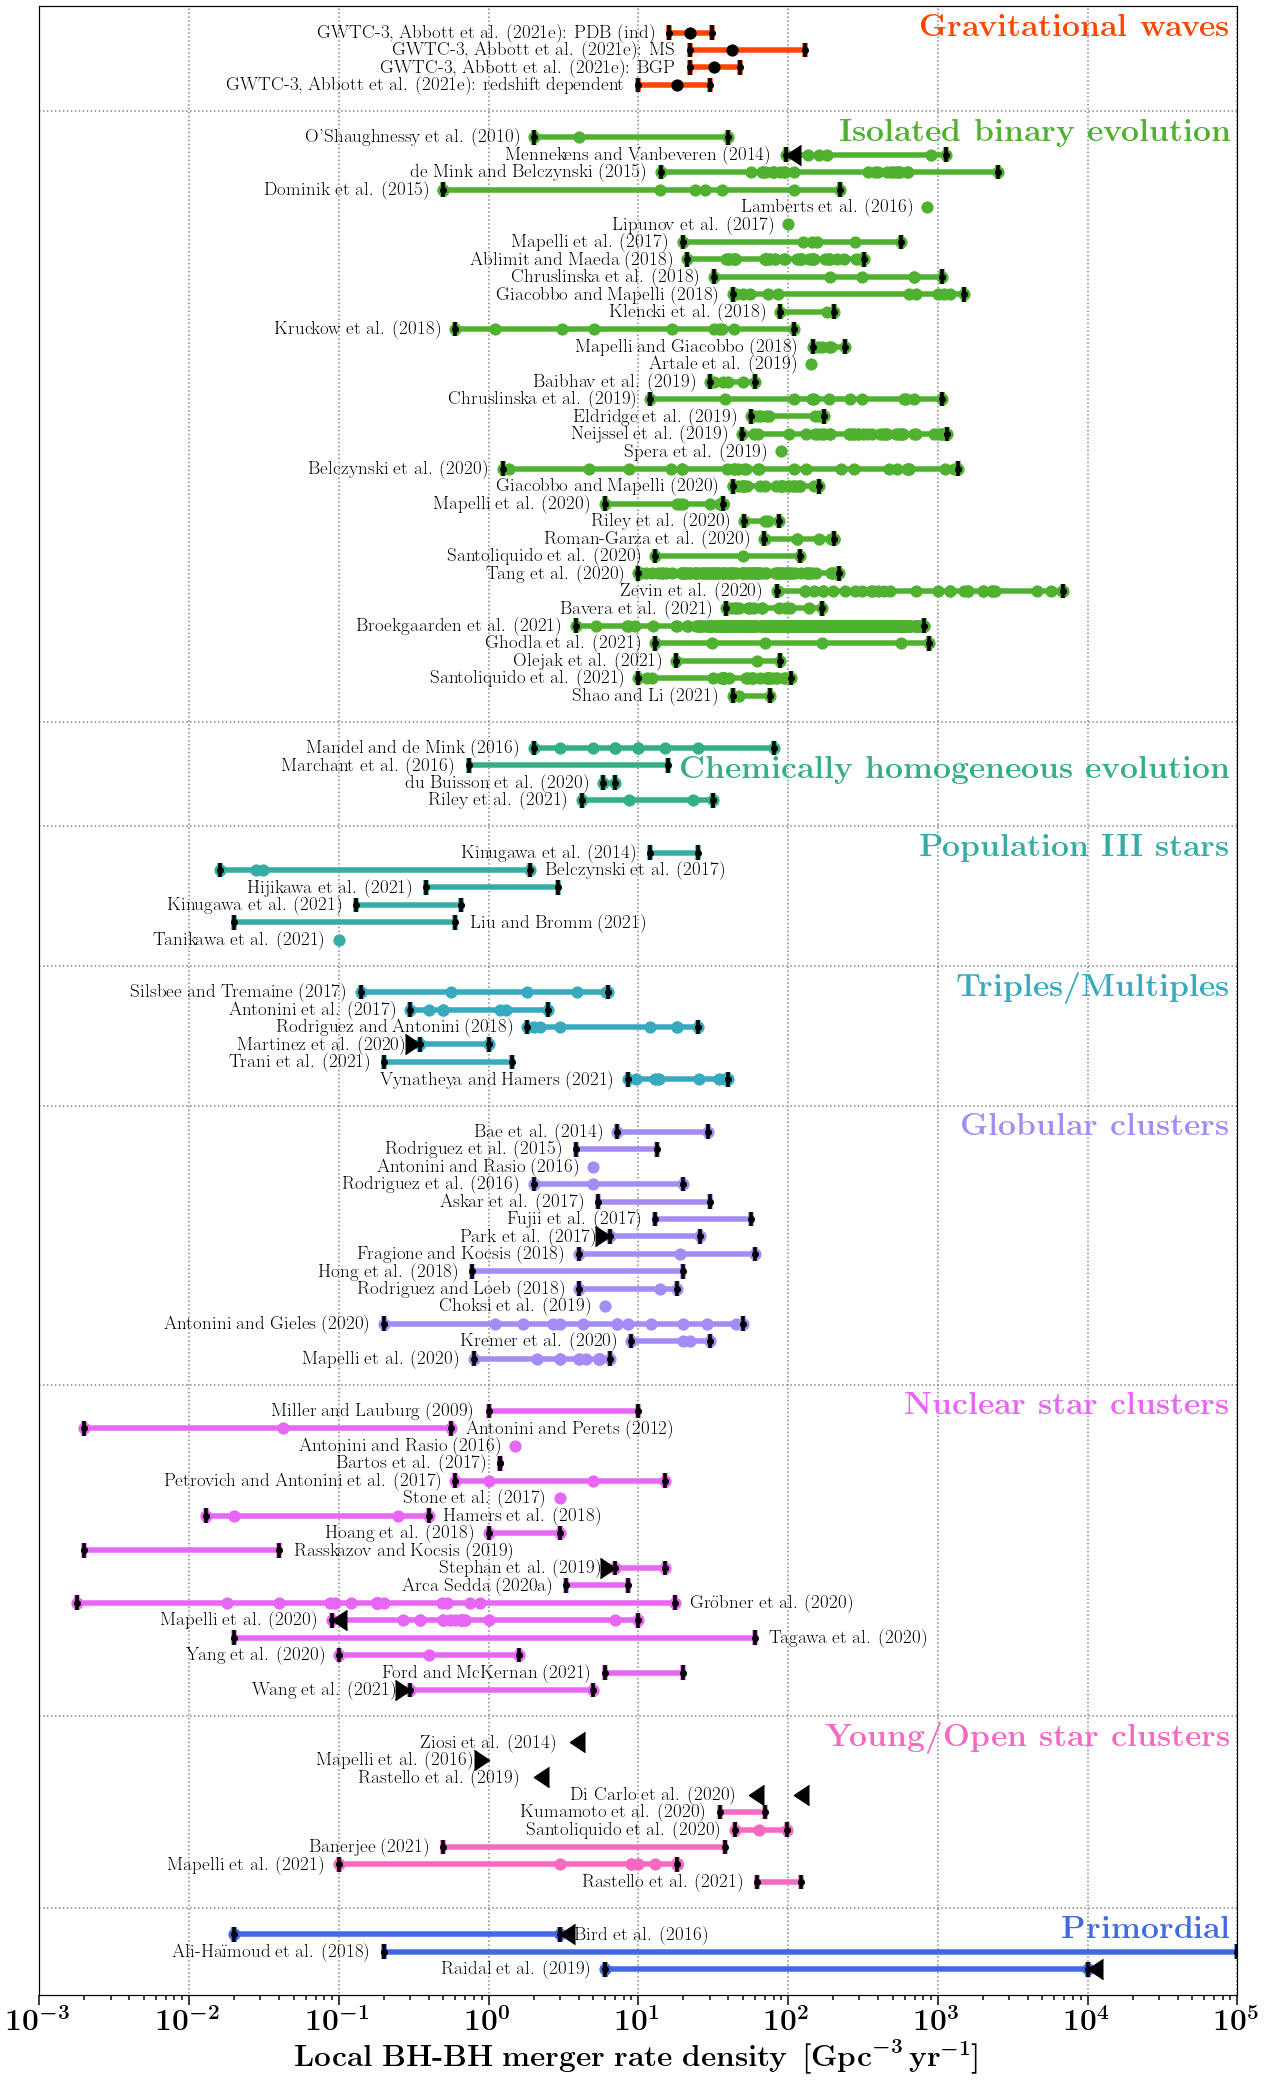

the total vertical length of the BHNS plot reaches: -67 this is information floor uses for deciding the length of the figure - ignore this


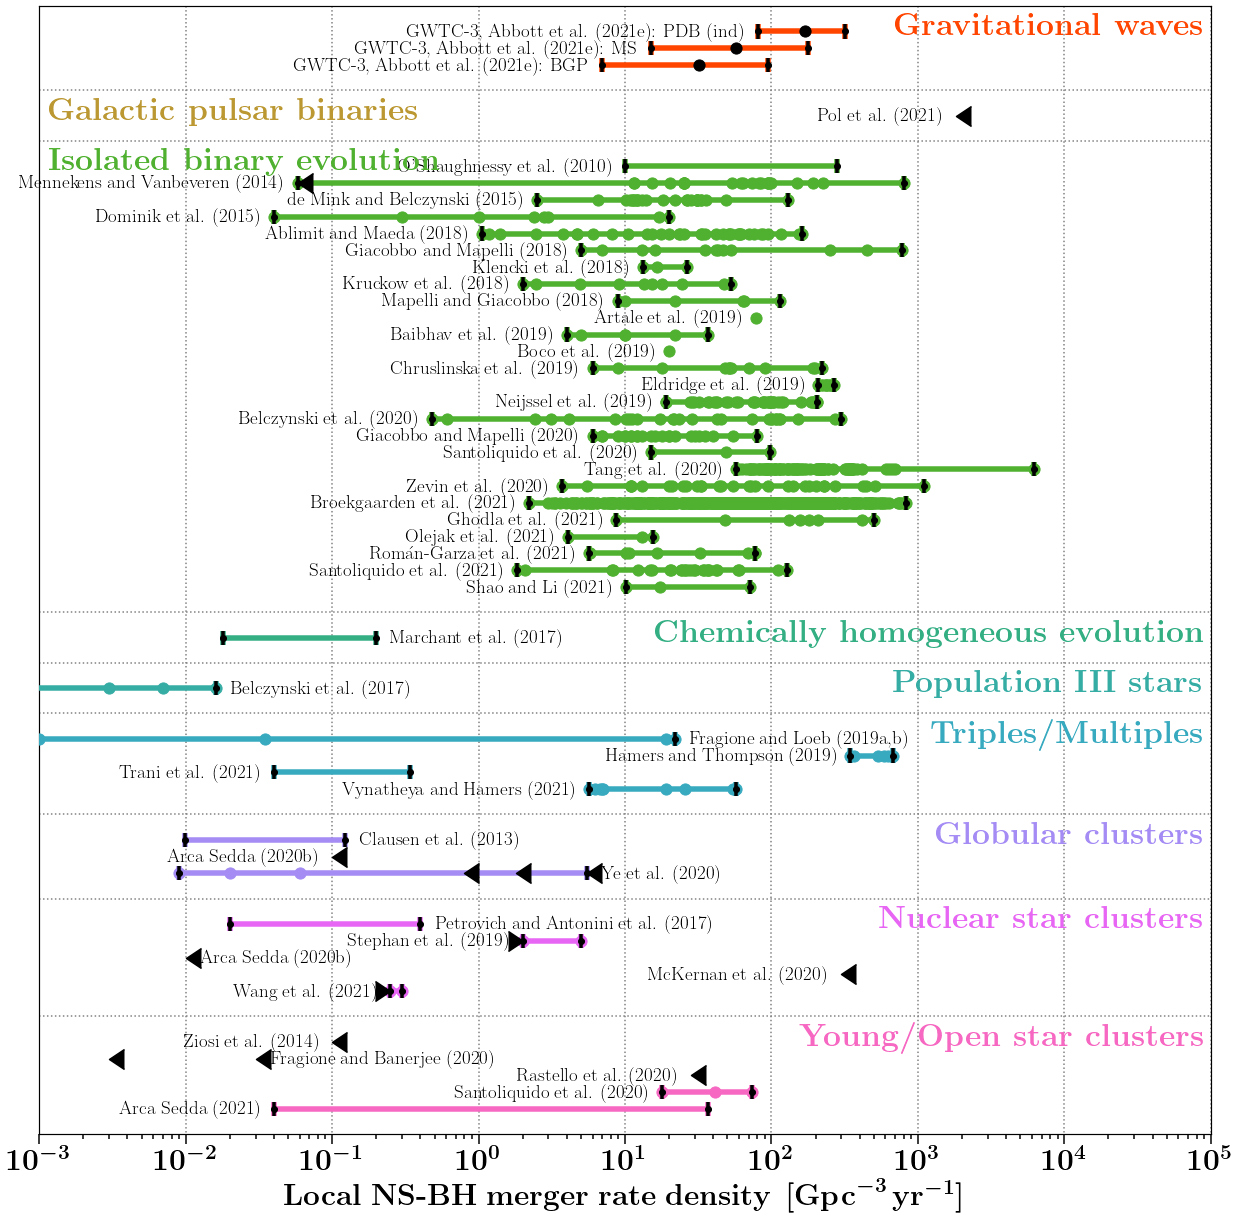

the total vertical length of the NSNS plot reaches: -83 this is information floor uses for deciding the length of the figure - ignore this


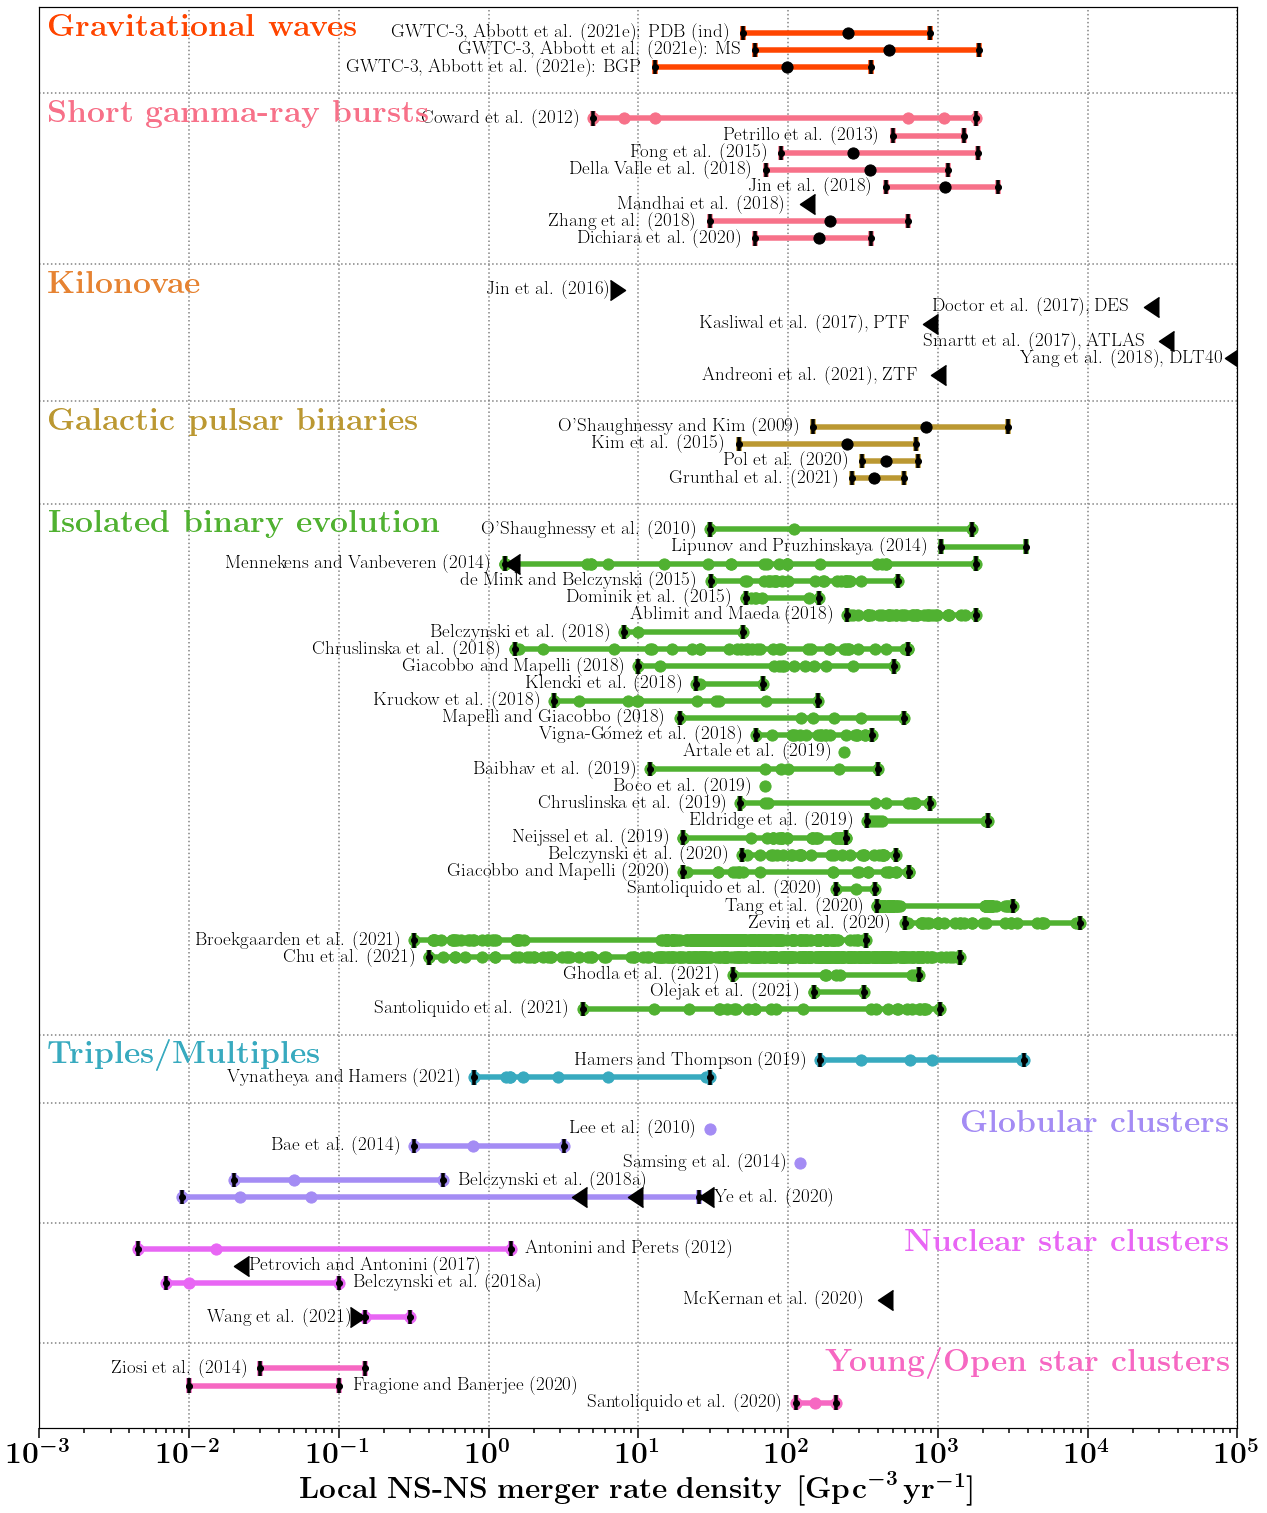

In [41]:
# make the BH-BH rates comparison figure 
make_figure(DCOtype='BHBH', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR')
make_figure(DCOtype='BHNS', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR')
make_figure(DCOtype='NSNS', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR')



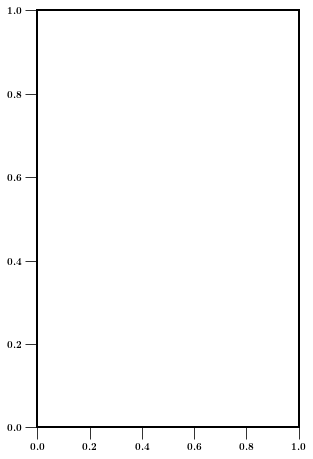

In [29]:
cm = 1/2.54

d1, d2 = 11.9*cm, 19.5*cm 
f, axe= plt.subplots(ncols=1,nrows=1,figsize=(d1,d2), gridspec_kw={"width_ratios":[1], "height_ratios":[1]})  


the total vertical length of the BHNS plot reaches: -67 this is information floor uses for deciding the length of the figure - ignore this


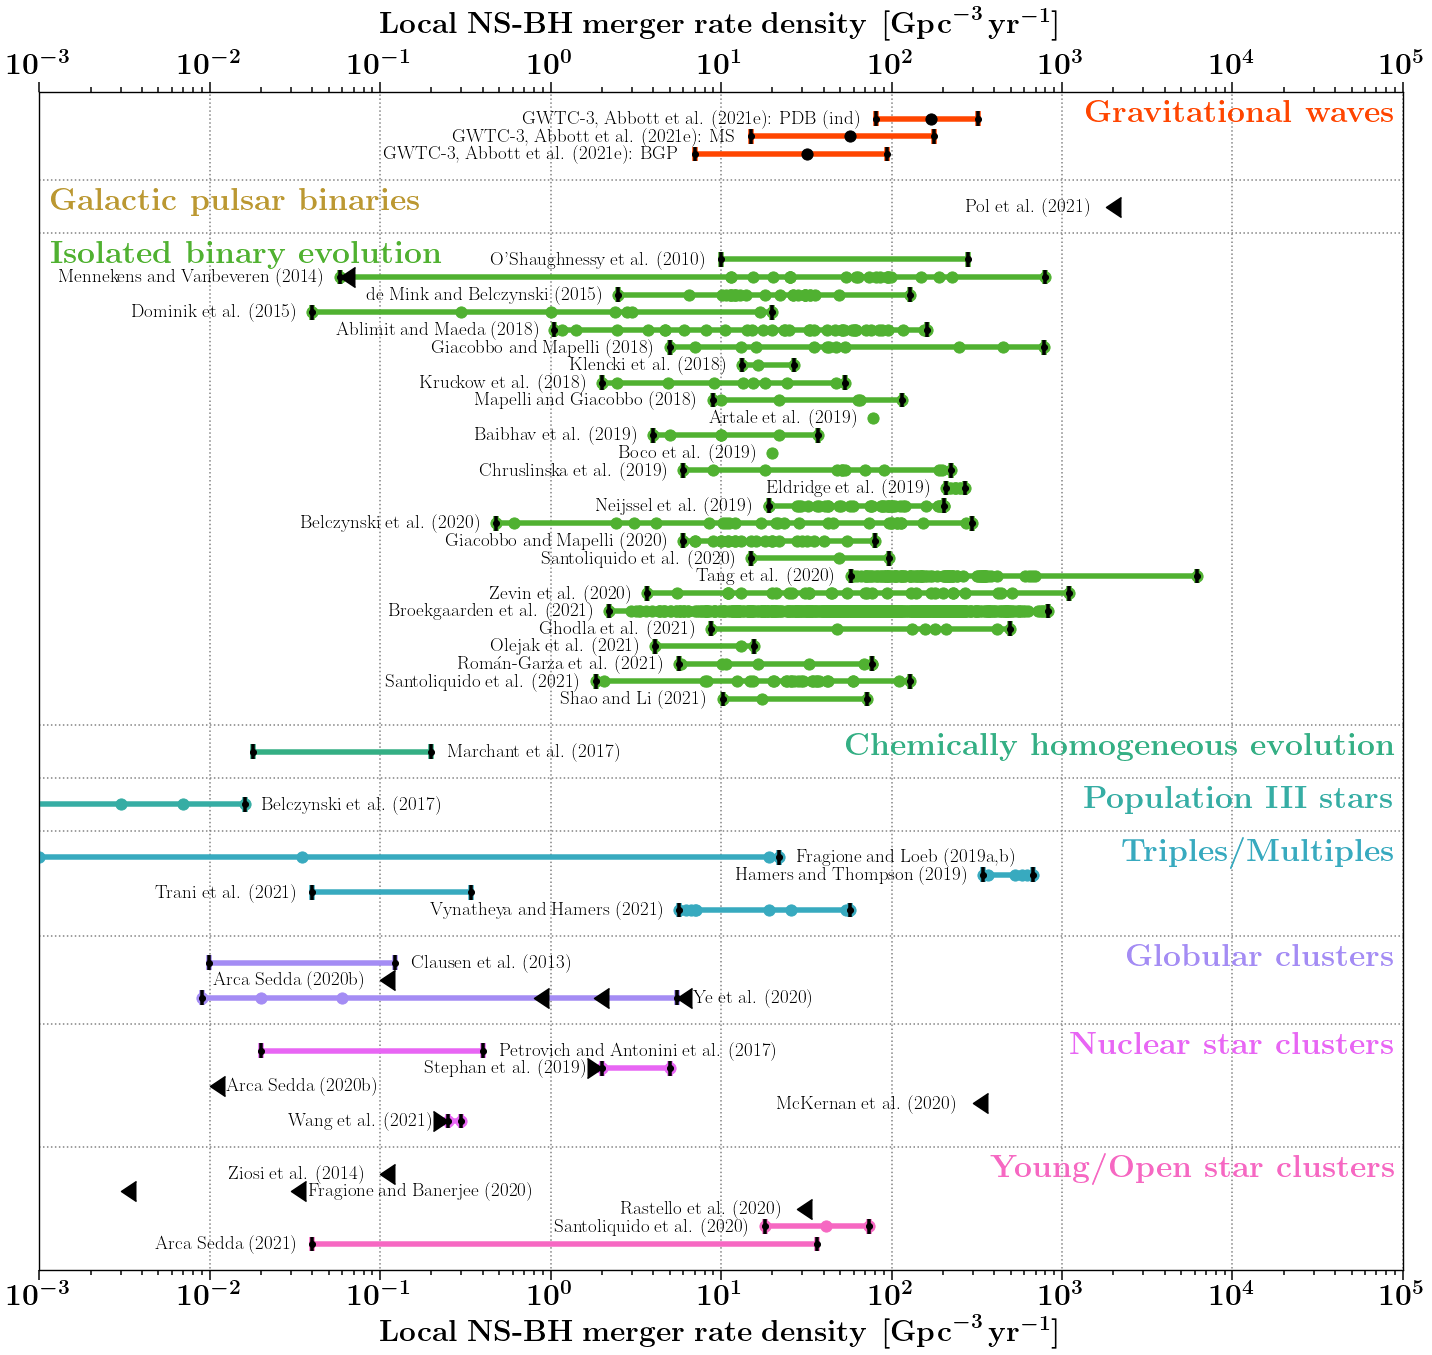

In [30]:
# make the NS-BH rates comparison figure 
make_figure(DCOtype='BHNS', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory)



the total vertical length of the NSNS plot reaches: -83 this is information floor uses for deciding the length of the figure - ignore this


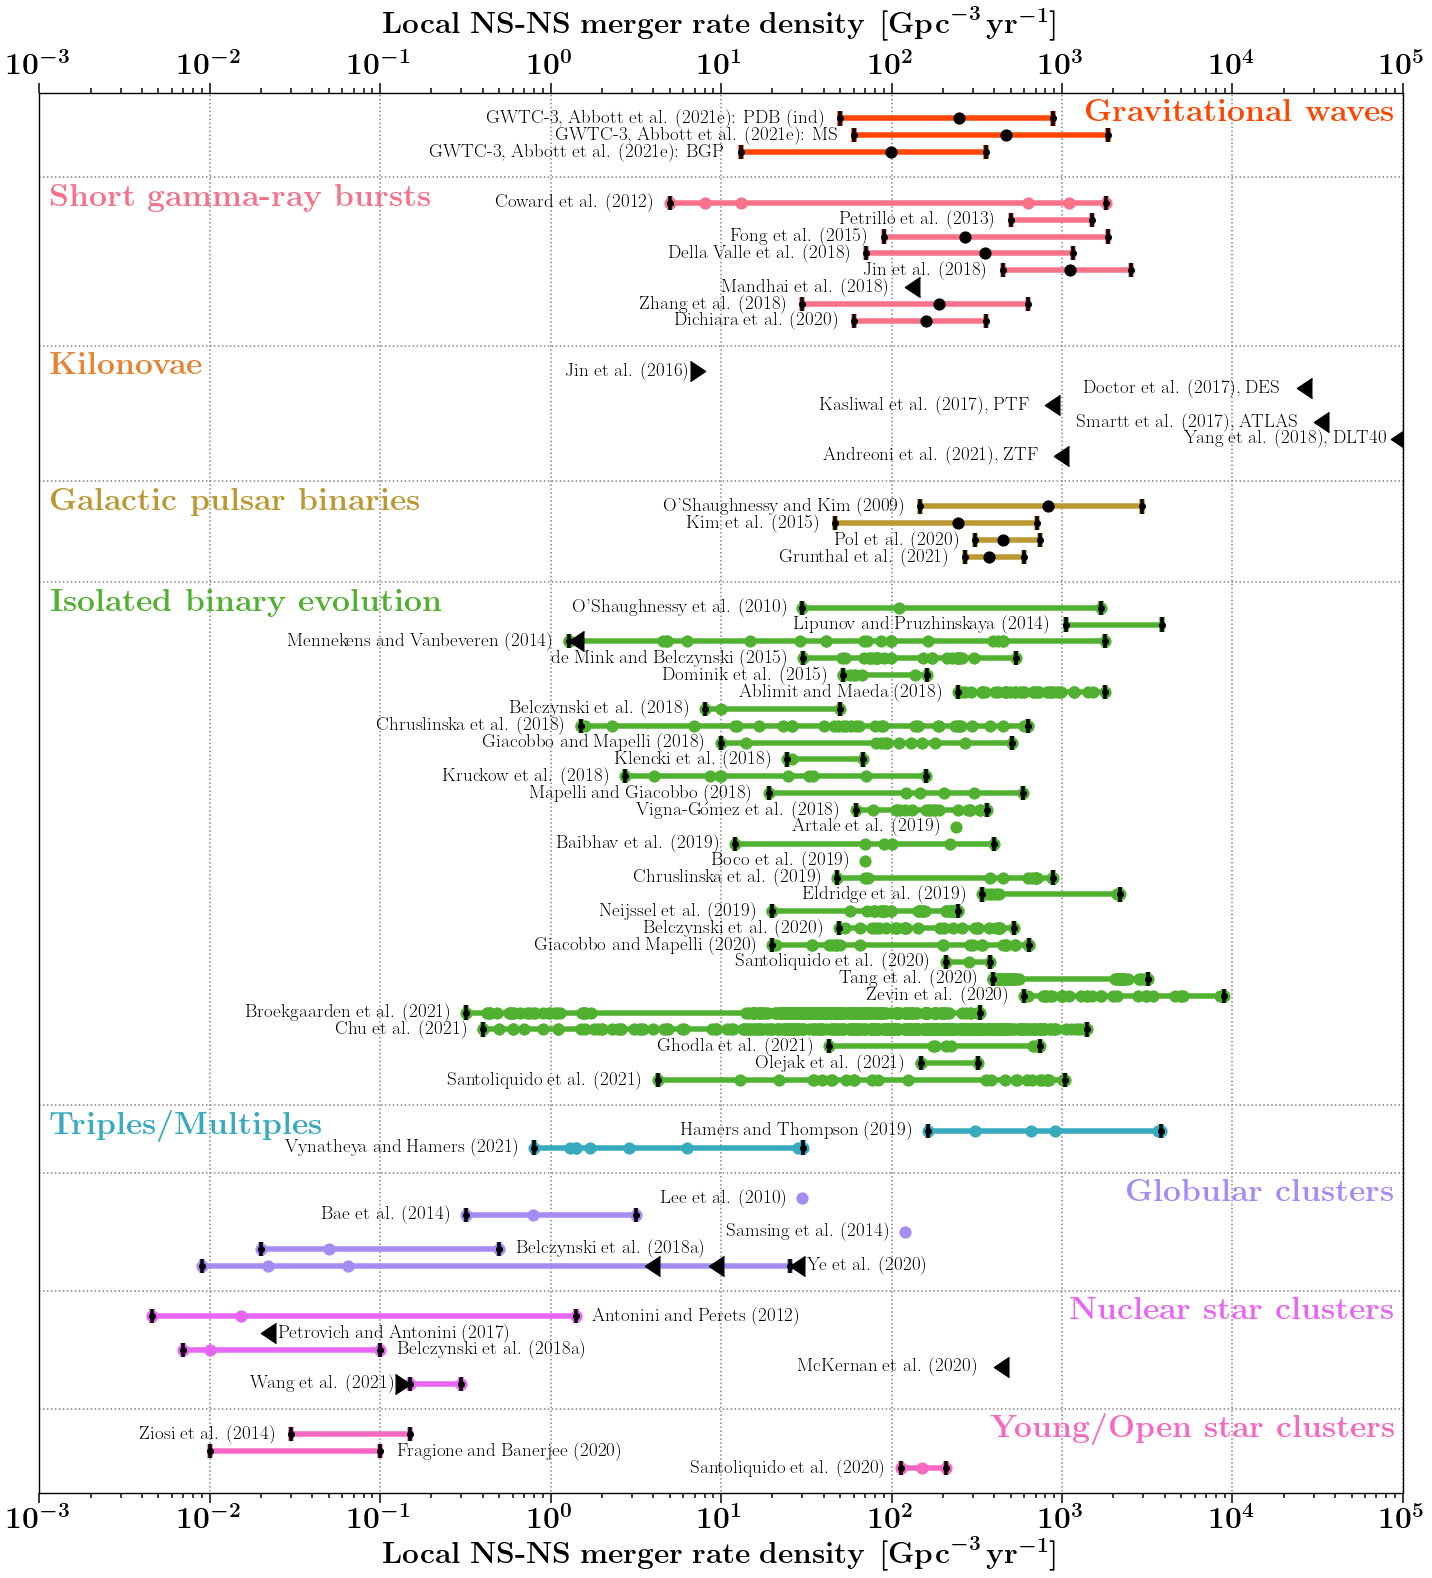

In [5]:
# make the NS-NS rates comparison figure 
make_figure(DCOtype='NSNS',ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory)



## Some code to create the color map used above (see the plotting scripts)

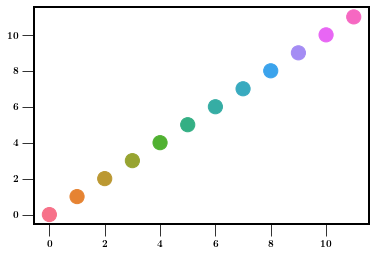

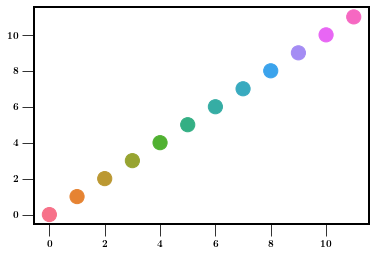

/Users/floorbroekgaarden/Library/Python/3.7/lib/python/site-packages/matplotlib/cbook/__init__.py:1061: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


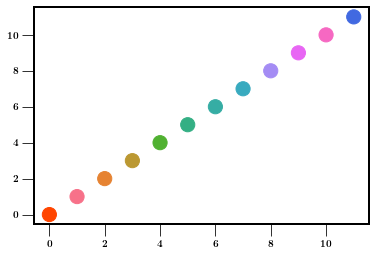

In [6]:


all_names = [ 'GWs', 'sGRBs', 'kilonovae', 'pulsars',\
                       'isolated binaries',  'CHE','pop-III','triples', 'dynamical: GC', 'dynamical: NC',  'dynamical: YSC',  'primordial']
colors = sns.color_palette("husl", len(all_names))   



# colors_is = 

name_colors = dict(zip(all_names, colors))

 
xx = range(len(all_names))
yy = xx

plt.scatter(xx,yy, c=colors, s=200)
plt.show()


colors = sns.color_palette("husl", 12)
xx = range(len(colors))
yy = xx

plt.scatter(xx,yy, c=colors, s=200)
plt.show()





c_GW = 'orangered'
c_GRB = sns.color_palette("husl", 12)[0] #  sns.color_palette("husl", 20)[1] 
c_kn = sns.color_palette("husl", 12)[1] #'darkgoldenrod' #sns.color_palette("husl", 20)[3]
c_psr =  sns.color_palette("husl", 12)[2]# "orange"

c_iso = sns.color_palette("husl", 12)[4] #  sns.color_palette("husl", 20)[6] #'limegreen'
c_che = sns.color_palette("husl", 12)[5] #"forestgreen" #sns.color_palette("husl", 20)[8]
c_popIII = sns.color_palette("husl", 12)[6] # "c" #"turquoise" # sns.color_palette("husl", 20)[12]
c_trip = sns.color_palette("husl", 12)[7] #"royalblue" #sns.color_palette("husl", 20)[13]

c_GC =  sns.color_palette("husl", 12)[9] #sns.color_palette("husl", 20)[15] 
c_NC = sns.color_palette("husl", 12)[10] # "blueviolet" #
c_YC =  sns.color_palette("husl", 12)[11] # "magenta"

c_prim = "royalblue" #"brown"


colors = [c_GW, c_GRB, c_kn, c_psr, c_iso, c_che, c_popIII, c_trip, c_GC, c_NC, c_YC, c_prim]
xx = range(len(colors))
yy = xx

plt.scatter(xx,yy, c=colors, s=200)
plt.show()